In [72]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [73]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [74]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [75]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [76]:
y_train[0]

5

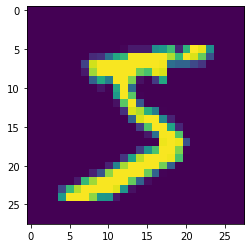

In [77]:
plt.imshow(X_train[0])

In [78]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [79]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [80]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [81]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [82]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [83]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 218s 116ms/step - loss: 0.2351 - accuracy: 0.9507 - val_loss: 0.0922 - val_accuracy: 0.9736
Epoch 2/5
1875/1875 [==============================] - 216s 115ms/step - loss: 0.0735 - accuracy: 0.9772 - val_loss: 0.0827 - val_accuracy: 0.9745
Epoch 3/5
1875/1875 [==============================] - 209s 111ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0856 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 209s 112ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.1003 - val_accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 211s 113ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0972 - val_accuracy: 0.9784


In [84]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09717515856027603, 0.9783999919891357]


In [85]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 60ms/step
[[1.66939021e-12 1.26919905e-19 4.75808845e-13 6.46164233e-10
  1.39437149e-14 6.28835354e-15 6.06131586e-20 1.00000000e+00
  8.48547849e-13 1.35952885e-08]
 [3.97657907e-09 4.64341517e-11 1.00000000e+00 2.01238267e-12
  4.59413148e-16 3.68288881e-19 2.38664002e-11 1.92158606e-18
  2.66315980e-11 2.01533180e-13]
 [9.69931253e-12 9.99996901e-01 5.54290729e-08 1.49064771e-11
  6.46371575e-07 3.09112416e-08 1.77641148e-11 3.45499296e-09
  2.35340030e-06 6.26058233e-11]
 [1.00000000e+00 1.11638405e-17 1.14453282e-11 1.25118373e-16
  6.15666575e-15 2.89746322e-14 8.08431187e-12 8.71777287e-14
  2.87950436e-13 1.79391571e-10]]


In [86]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
